In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/themaestrodatasetv2/maestro-v2.0.0/LICENSE
/kaggle/input/themaestrodatasetv2/maestro-v2.0.0/README
/kaggle/input/themaestrodatasetv2/maestro-v2.0.0/maestro-v2.0.0.csv
/kaggle/input/themaestrodatasetv2/maestro-v2.0.0/maestro-v2.0.0.json
/kaggle/input/themaestrodatasetv2/maestro-v2.0.0/2017/MIDI-Unprocessed_058_PIANO058_MID--AUDIO-split_07-07-17_Piano-e_2-02_wav--3.mp3
/kaggle/input/themaestrodatasetv2/maestro-v2.0.0/2017/MIDI-Unprocessed_062_PIANO062_MID--AUDIO-split_07-07-17_Piano-e_2-07_wav--2.midi
/kaggle/input/themaestrodatasetv2/maestro-v2.0.0/2017/MIDI-Unprocessed_065_PIANO065_MID--AUDIO-split_07-07-17_Piano-e_3-01_wav--2.mp3
/kaggle/input/themaestrodatasetv2/maestro-v2.0.0/2017/MIDI-Unprocessed_060_PIANO060_MID--AUDIO-split_07-07-17_Piano-e_2-04_wav--4.midi
/kaggle/input/themaestrodatasetv2/maestro-v2.0.0/2017/MIDI-Unprocessed_073_PIANO073_MID--AUDIO-split_07-08-17_Piano-e_2-02_wav--4.mp3
/kaggle/input/themaestrodatasetv2/maestro-v2.0.0/2017/MIDI-Unprocessed_054_PIA

In [2]:
!pip install note_seq
!pip install librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 62.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 4.5 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26118 sha256=41c8769d743782078a0418185d915cfce58a72c72d404aac4cc5ded23256e2a2
  Stored in directory: /root/.cache/pip/wheels/01/94/38/6fe5b0e582dca953d1ef8f2e8714fa1def8e5bf514c25c11fb
  Created wheel for pretty-midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592305 sha256=7323cce80bdb7d39422ee8e78e5c9a9165f8eae455b7c516d678b7684c614e7d
  Stored in directory: /root/.cache/pip/wheels/ea/8a/5a/615ed5b0cab54051df

In [3]:
ds=pd.read_csv('/kaggle/input/themaestrodatasetv2/maestro-v2.0.0/maestro-v2.0.0.csv')
ds2004=pd.read_csv('/kaggle/input/maestro-v2/meastro-v2/maestro-v2.0.0 - 2004.csv')
ds2006=pd.read_csv('/kaggle/input/maestro-v2/meastro-v2/maestro-v2.0.0 - 2006.csv')
ds2008=pd.read_csv('/kaggle/input/maestro-v2/meastro-v2/maestro-v2.0.0 - 2008.csv')

In [4]:
pd.set_option("display.max.rows",None)
ds2004

canonical_composer  \
0                                   Alexander Scriabin   
1                                   Alexander Scriabin   
2                                       Claude Debussy   
3                                       Claude Debussy   
4                                       Claude Debussy   
5                                          Franz Liszt   
6                                          Franz Liszt   
7                                          Franz Liszt   
8                                          Franz Liszt   
9                                       Franz Schubert   
10                                      Franz Schubert   
11                                      Franz Schubert   
12                                      Franz Schubert   
13                                      Franz Schubert   
14                                      Franz Schubert   
15                                      Franz Schubert   
16                                      Franz Schubert   
17                                      Franz Schubert   
18                                      Franz Schubert   
19                                      Franz Schubert   
20                                      Franz Schubert   
21                                      Franz Schubert   
22                                      Franz Schubert   
23                                      Franz Schubert   
24                                      Franz Schubert   
25                                      Franz Schubert   
26                                      Franz Schubert   
27                                      Franz Schubert   
28                                      Franz Schubert   
29                                      Franz Schubert   
30                                      Franz Schubert   
31                                      Franz Schubert   
32                                      Franz Schubert   
33                                      Franz Schubert   
34                                      Franz Schubert   
35                                      Franz Schubert   
36                                      Franz Schubert   
37                                      Franz Schubert   
38                                      Franz Schubert   
39                                      Franz Schubert   
40                                      Franz Schubert   
41                        Franz Schubert / Franz Liszt   
42                        Franz Schubert / Franz Liszt   
43                                     Frédéric Chopin   
44                                     Frédéric Chopin   
45                                     Frédéric Chopin   
46                                     Frédéric Chopin   
47                                     Frédéric Chopin   
48                                     Frédéric Chopin   
49                                     Frédéric Chopin   
50                                     Frédéric Chopin   
51                                     Frédéric Chopin   
52                                     Frédéric Chopin   
53                                     Frédéric Chopin   
54                                     Frédéric Chopin   
55                                     Frédéric Chopin   
56                              George Frideric Handel   
57                                       Isaac Albéniz   
58                                       Isaac Albéniz   
59                                       Isaac Albéniz   
60   Johann Christian Fischer / Wolfgang Amadeus Mo...   
61                               Johann Sebastian Bach   
62                               Johann Sebastian Bach   
63                               Johann Sebastian Bach   
64                               Johann Sebastian Bach   
65                  Johann Sebastian Bach / Egon Petri   
66            Johann Sebastian Bach / Ferruccio Busoni   
67            Johann Sebastian Bach / Ferruccio Busoni   
68                                

In [5]:
ds2006

canonical_composer  \
0                                Alexander Scriabin   
1                                Alexander Scriabin   
2                      Charles Gounod / Franz Liszt   
3                                    Claude Debussy   
4                                    Claude Debussy   
5                                    Claude Debussy   
6                                    Claude Debussy   
7                                    Claude Debussy   
8                                    Claude Debussy   
9           Felix Mendelssohn / Sergei Rachmaninoff   
10                                      Franz Liszt   
11                                      Franz Liszt   
12                                      Franz Liszt   
13                                      Franz Liszt   
14                                      Franz Liszt   
15                                      Franz Liszt   
16                                      Franz Liszt   
17                                   Franz Schubert   
18                                   Franz Schubert   
19                                   Franz Schubert   
20                                   Franz Schubert   
21                                   Franz Schubert   
22                                   Franz Schubert   
23                                   Franz Schubert   
24                                   Franz Schubert   
25                                   Franz Schubert   
26                                   Franz Schubert   
27                                   Franz Schubert   
28                                   Franz Schubert   
29                                   Franz Schubert   
30                                   Franz Schubert   
31                                   Franz Schubert   
32                                   Franz Schubert   
33                                   Franz Schubert   
34                                   Franz Schubert   
35                                   Franz Schubert   
36                                   Franz Schubert   
37                                   Franz Schubert   
38                                   Franz Schubert   
39                                   Franz Schubert   
40                                   Franz Schubert   
41                                   Franz Schubert   
42                                   Franz Schubert   
43                                   Franz Schubert   
44                     Franz Schubert / Franz Liszt   
45                                  Frédéric Chopin   
46                                  Frédéric Chopin   
47                                  Frédéric Chopin   
48                                  Frédéric Chopin   
49                                  Frédéric Chopin   
50                                    George Enescu   
51                     Giuseppe Verdi / Franz Liszt   
52                                    Isaac Albéniz   
53                             Jean-Philippe Rameau   
54                            Johann Sebastian Bach   
55                            Johann Sebastian Bach   
56         Johann Sebastian Bach / Ferruccio Busoni   
57         Johann Sebastian Bach / Ferruccio Busoni   
58              Johann Sebastian Bach / Franz Liszt   
59                                  Johannes Brahms   
60                                  Johannes Brahms   
61                                     Joseph Haydn   
62                                     Joseph Haydn   
63                                     Joseph Haydn   
64                             Ludwig van Beethoven   
65                             Ludwig van Beethoven   
66                             Ludwig van Beethoven   
67                             Ludwig van Beethoven   
68                             Ludwig van Beethoven   
69                                Modest Mussorgsky   
70                                Modest Mussorgsky   
71                                   Muzio Clementi   
72                

In [6]:
ds2008

canonical_composer  \
0                                       Alban Berg   
1                               Alexander Scriabin   
2                               Alexander Scriabin   
3                             Carl Maria von Weber   
4                                   Claude Debussy   
5                                   Claude Debussy   
6                                   Claude Debussy   
7                                   Claude Debussy   
8                                   Claude Debussy   
9                                   Claude Debussy   
10                                  Claude Debussy   
11                                  Claude Debussy   
12                                  Claude Debussy   
13                              Domenico Scarlatti   
14                               Felix Mendelssohn   
15                               Felix Mendelssohn   
16                               Felix Mendelssohn   
17                               Felix Mendelssohn   
18         Felix Mendelssohn / Sergei Rachmaninoff   
19                                     Franz Liszt   
20                                     Franz Liszt   
21                                     Franz Liszt   
22                                     Franz Liszt   
23                                     Franz Liszt   
24                                     Franz Liszt   
25                                     Franz Liszt   
26                                     Franz Liszt   
27                                     Franz Liszt   
28                                     Franz Liszt   
29                                     Franz Liszt   
30                                     Franz Liszt   
31                                     Franz Liszt   
32                                  Franz Schubert   
33                                  Franz Schubert   
34                                  Franz Schubert   
35                                  Franz Schubert   
36                                  Franz Schubert   
37                                  Franz Schubert   
38                                  Franz Schubert   
39                                  Franz Schubert   
40                                  Franz Schubert   
41                                 Frédéric Chopin   
42                                 Frédéric Chopin   
43                                 Frédéric Chopin   
44                                 Frédéric Chopin   
45                                 Frédéric Chopin   
46                                 Frédéric Chopin   
47                                 Frédéric Chopin   
48                                 Frédéric Chopin   
49                                 Frédéric Chopin   
50                                 Frédéric Chopin   
51                                 Frédéric Chopin   
52                                 Frédéric Chopin   
53                                 Frédéric Chopin   
54                                 Frédéric Chopin   
55                                 Frédéric Chopin   
56                                Johann Pachelbel   
57                           Johann Sebastian Bach   
58                           Johann Sebastian Bach   
59                           Johann Sebastian Bach   
60                           Johann Sebastian Bach   
61                           Johann Sebastian Bach   
62                           Johann Sebastian Bach   
63                           Johann Sebastian Bach   
64                           Johann Sebastian Bach   
65                           Johann Sebastian Bach   
66                           Johann Sebastian Bach   
67                           Johann Sebastian Bach   
68                           Johann Sebastian Bach   
69                           Johann Sebastian Bach   
70                           Johann Sebastian Bach   
71                                 Johannes Brahms   
72                                 Johannes Brahms   
73                                  

In [7]:
print('shape of directory 2004:',ds2004.shape,'\nshape of directory 2006:',ds2006.shape,'\nshape of directory 2008:',ds2008.shape)

shape of directory 2004: (132, 7) 
shape of directory 2006: (115, 7) 
shape of directory 2008: (147, 7)


In [8]:
print('index for all the columns: \n',ds.columns)

index for all the columns: 
 Index(['canonical_composer', 'canonical_title', 'split', 'year',
       'midi_filename', 'audio_filename', 'duration'],
      dtype='object')


In [9]:
ds2004.groupby('year').sum(),ds2006.groupby('year').sum(),ds2008.groupby('year').sum()

(          duration
 year              
 2004  83447.026931,
           duration
 year              
 2006  90998.442655,
           duration
 year              
 2008  52653.903009)

In [10]:
ds2004.info(), ds2006.info(),ds2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   canonical_composer  132 non-null    object 
 1   canonical_title     132 non-null    object 
 2   split               132 non-null    object 
 3   year                132 non-null    int64  
 4   midi_filename       132 non-null    object 
 5   audio_filename      132 non-null    object 
 6   duration            132 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 7.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   canonical_composer  115 non-null    object 
 1   canonical_title     115 non-null    object 
 2   split               115 non-null    object 
 3   year                115 non-null    int

(None, None, None)

In [11]:
print(ds2004.describe(),'\n\n', ds2006.describe(),'\n\n', ds2008.describe())

         year     duration
count   132.0   132.000000
mean   2004.0   632.174446
std       0.0   447.611043
min    2004.0   114.696243
25%    2004.0   294.400040
50%    2004.0   521.317403
75%    2004.0   771.546068
max    2004.0  2398.640360 

          year     duration
count   115.0   115.000000
mean   2006.0   791.290806
std       0.0   450.101845
min    2006.0   114.583219
25%    2006.0   457.939579
50%    2006.0   677.290989
75%    2006.0   999.528247
max    2006.0  2009.462467 

          year    duration
count   147.0  147.000000
mean   2008.0  358.189816
std       0.0  191.361891
min    2008.0   53.936912
25%    2008.0  221.663106
50%    2008.0  305.818337
75%    2008.0  475.094343
max    2008.0  939.133676


In [12]:
ds2004.describe(include=object)

canonical_composer          canonical_title  split  \
count                 132                      132    132   
unique                 23                       78      3   
top        Franz Schubert  Sonata in C Minor, D958  train   
freq                   32                       10    103   

                                            midi_filename  \
count                                                 132   
unique                                                132   
top     2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...   
freq                                                    1   

                                           audio_filename  
count                                                 132  
unique                                                132  
top     2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...  
freq                                                    1

In [13]:
ds2006.describe(include=object)

canonical_composer   canonical_title  split  \
count                 115               115    115   
unique                 32                86      3   
top        Franz Schubert  Sonata in A Min.  train   
freq                   28                 8     90   

                                            midi_filename  \
count                                                 115   
unique                                                115   
top     2006/MIDI-Unprocessed_19_R1_2006_01-07_ORIG_MI...   
freq                                                    1   

                                           audio_filename  
count                                                 115  
unique                                                115  
top     2006/MIDI-Unprocessed_19_R1_2006_01-07_ORIG_MI...  
freq                                                    1

In [14]:
ds2008.describe(include=object)

canonical_composer                           canonical_title  split  \
count                 147                                       147    147   
unique                 25                                       126      3   
top           Franz Liszt  Thirty-Two Variations in C Minor, WoO 80  train   
freq                   23                                         5     99   

                                            midi_filename  \
count                                                 147   
unique                                                147   
top     2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...   
freq                                                    1   

                                           audio_filename  
count                                                 147  
unique                                                147  
top     2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...  
freq                                                    1

In [15]:
import json
import pandas as pd
import plotly_express as px
def get_json_file(path):
    f = open(path)
    return json.load(f)
metadata_dict = get_json_file('/kaggle/input/themaestrodatasetv2/maestro-v2.0.0/maestro-v2.0.0.json')
metadata_dict[0]


{'canonical_composer': 'Alban Berg',
 'canonical_title': 'Sonata Op. 1',
 'split': 'train',
 'year': 2018,
 'midi_filename': '2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R3_2018_wav--1.midi',
 'audio_filename': '2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R3_2018_wav--1.wav',
 'duration': 698.661160312}

In [16]:
duplicate_rows_df = ds[ds.duplicated()]
duplicate_rows_df.shape

(0, 7)

In [17]:
ds.count() 

canonical_composer    1282
canonical_title       1282
split                 1282
year                  1282
midi_filename         1282
audio_filename        1282
duration              1282
dtype: int64

# **EDA**


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)

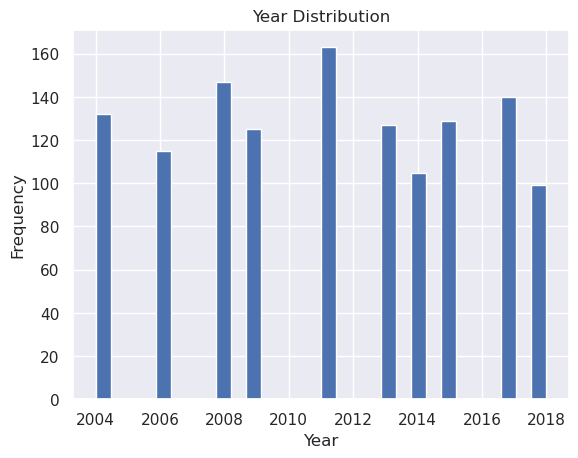

In [19]:
ds=pd.read_csv('/kaggle/input/themaestrodatasetv2/maestro-v2.0.0/maestro-v2.0.0.csv')
year=ds['year']
plt.hist( year, bins=30,histtype='barstacked')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Year Distribution')
plt.show()


Text(0, 0.5, 'Duration (seconds)')

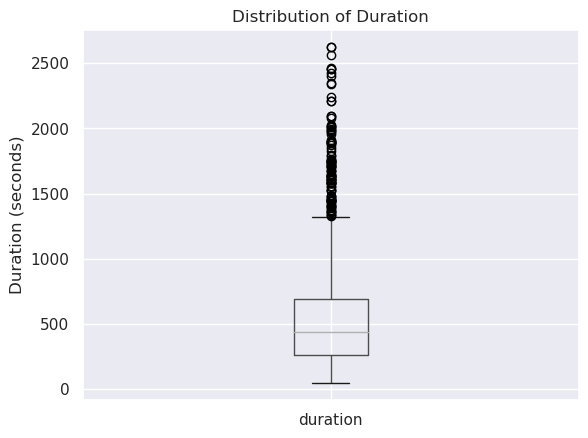

In [20]:
ds=pd.read_csv('/kaggle/input/themaestrodatasetv2/maestro-v2.0.0/maestro-v2.0.0.csv')
numeric_col = ['year','duration']
categorical_col = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
ds.boxplot('duration')
plt.title('Distribution of Duration')
plt.ylabel('Duration (seconds)')


# removing outlier

In [21]:
for x in ['duration']:
  q75,q25 = np.percentile(ds.loc[:,x],[75,25])
  intr_qr = q75-q25
  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)
 
  ds.loc[ds[x] < min,x] = np.nan 
  ds.loc[ds[x] > max,x] = np.nan
ds.isnull().sum()

canonical_composer      0
canonical_title         0
split                   0
year                    0
midi_filename           0
audio_filename          0
duration              101
dtype: int64

In [22]:
ds_new= ds.dropna(axis = 0)
ds_new.isnull().sum()

canonical_composer    0
canonical_title       0
split                 0
year                  0
midi_filename         0
audio_filename        0
duration              0
dtype: int64

<AxesSubplot:>

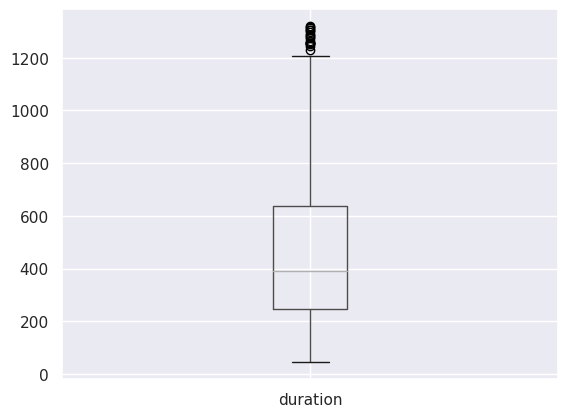

In [23]:
ds_new.boxplot('duration')

<AxesSubplot:>

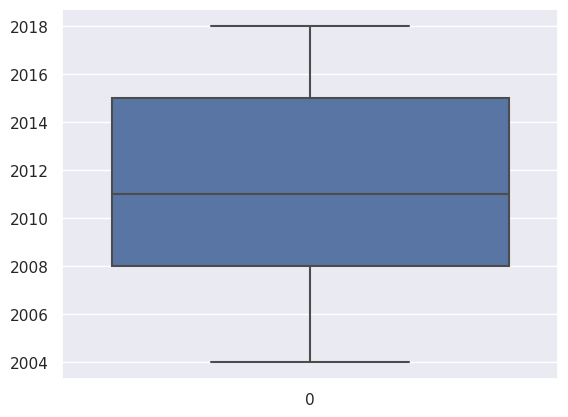

In [24]:
sns.boxplot(year)

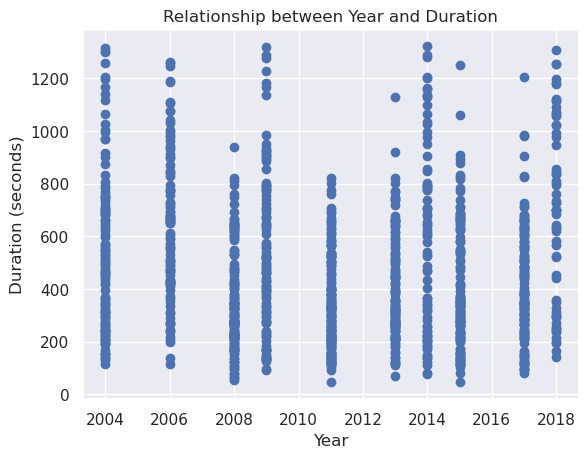

In [25]:
plt.scatter(year, ds['duration'])
plt.xlabel('Year')
plt.ylabel('Duration (seconds)')
plt.title('Relationship between Year and Duration')
plt.show()


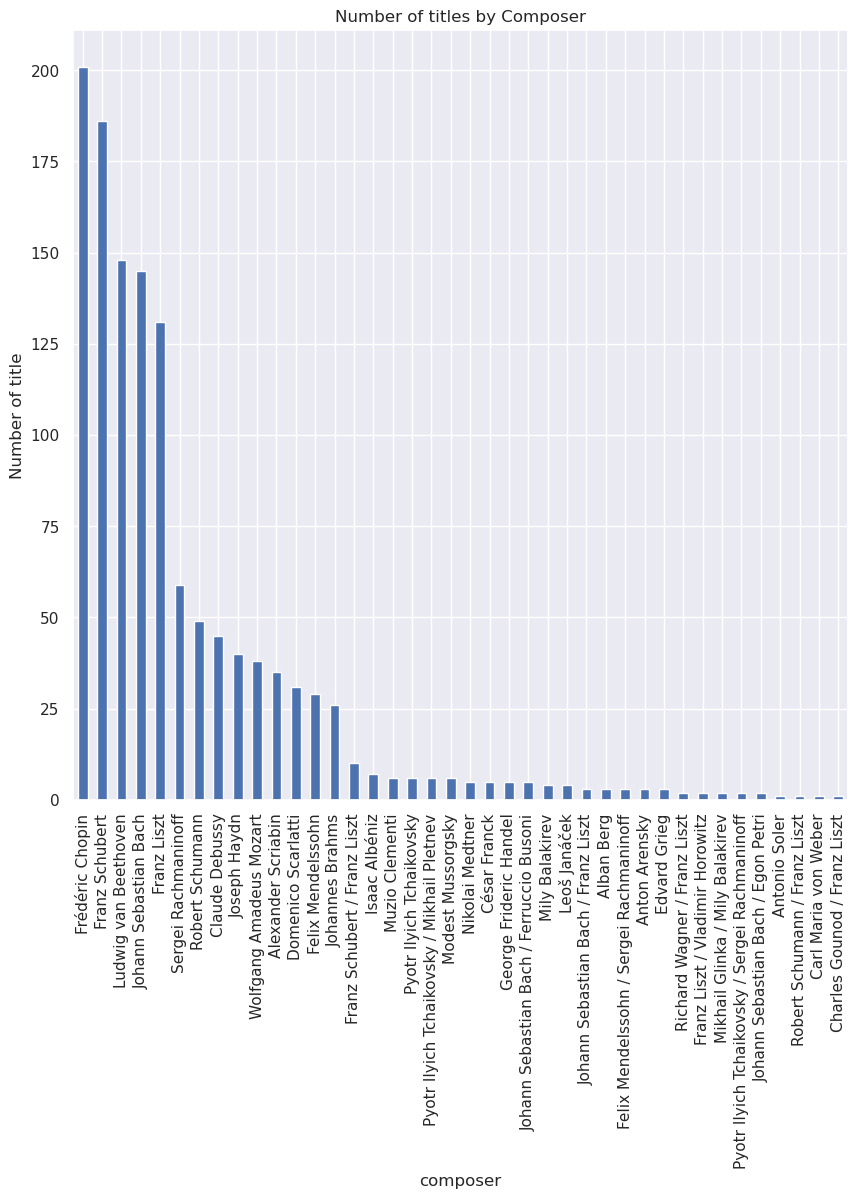

In [26]:
ds.canonical_composer.value_counts().nlargest(40).plot(kind='bar', figsize=(10,10))
plt.title("Number of titles by Composer")
plt.ylabel('Number of title')
plt.xlabel('composer');



year  duration
year      1.000000  0.030189
duration  0.030189  1.000000

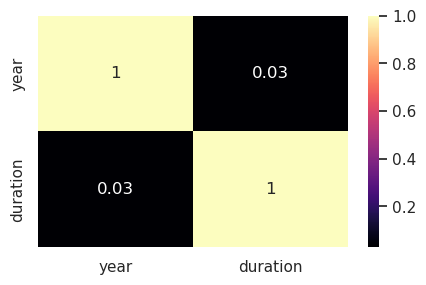

In [27]:
ds=pd.read_csv('/kaggle/input/themaestrodatasetv2/maestro-v2.0.0/maestro-v2.0.0.csv')
plt.figure(figsize=(5,3))
c= ds.corr()
sns.heatmap(c,cmap="magma",annot=True)
c

In [28]:
fig, ax = plt.subplots(figsize=(100,100))
ax.scatter(ds['canonical_composer'], ds['canonical_title'])
ax.set_xlabel('composer')
ax.set_ylabel('title')
plt.show()

Text(0.5, 1.0, 'Cumulative detailed histogram')

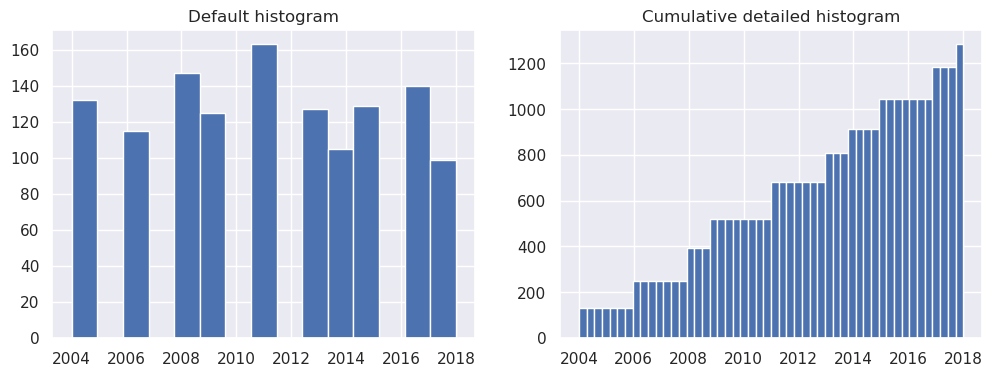

In [29]:
n = ds['year']
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(n, bins=15)
axes[0].set_title("Default histogram")
axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")


Text(0.5, 0, 'Duration (in seconds)')

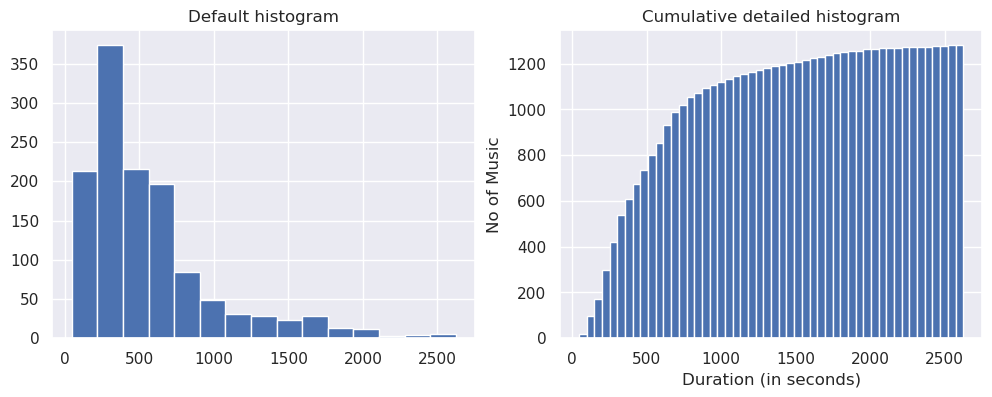

In [30]:
n = ds['duration']
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n, bins=15)
axes[0].set_title("Default histogram")
plt.ylabel('No of Music')
plt.xlabel('Duration (in seconds)');
axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
plt.ylabel('No of Music')
plt.xlabel('Duration (in seconds)')

